# SIIM-ISIC Melanoma Classification (Identify melanoma in lesion images)

# 1. Overview
Melanoma, the most serious type of skin cancer, develops in the cells (melanocytes) that produce melanin - the pigment that gives your skin its color. 
![Melanoma](img/melanoma_cell.png 'Melanoma')
Melanoma can also form in your eyes and, rarely, inside your body, such as in your nose or throat. These are sometimes referred to as hidden melanomas because they occur in places most people wouldn't think to check.

# 2. Symptoms
Melanomas can develop anywhere on your body. They most often develop in areas that don't receive much sun exposure, such as the soles of your feet, palms of your hands and fingernail beds. These hidden melanomas are more common in people with darker skin.

The first melanoma signs and symptoms often are:
- A change in an existing mole
- The development of a new pigmented or unusual-looking growth on your skin

Melanoma doesn't always begin as a mole. It can also occur on otherwise normal-appearing skin.

## Normal moles
Normal moles are generally a uniform color - such as tan, brown or black - with a distinct border separating the mole from your surrounding skin. They're oval or round and usually smaller than 1/4 inch (about 6 millimeters) in diameter - the size of a pencil eraser.
![Normal moles](img/moles.png)
Most moles begin appearing in childhood and new moles may form until age 40. By the time they are adults, most people have between 10 and 40 moles. Moles may change in appearance over time and some may even disappear with age.

## Unusual moles that may indicate melanoma
![Melanoma](img/melanoma.png)
To help you identify characteristics of unusual moles that may indicate melanomas or other skin cancers, think of the letters ABCDE:
- **A is for asymmetrical shape.** Look for moles with irregular shapes, such as two very different-looking halves.
- **B is for irregular border**. Look for moles with irregular, notched or scalloped borders - characteristics of melanomas.
- **C is for changes in color**. Look for growths that have many colors or an uneven distribution of color.
- **D is for diameter**. Look for new growth in a mole larger than 1/4 inch (about 6 millimeters).
- **E is for evolving.** Look for changes over time, such as a mole that grows in size or that changes color or shape. Moles may also evolve to develop new signs and symptoms, such as new itchiness or bleeding.

Cancerous (malignant) moles vary greatly in appearance. Some may show all of the changes listed above, while others may only one or two unusual characteristics.

# 3. Causes

Melanoma occurs when something goes wrong in the melanin-producing cells (melanocytes) that give color to your skin.

Normally, skin cells develop in a controlled and orderly way - healthy new cells push older cells toward your skin's surface, where they die and eventually fall off. But when some cells develop DNA damage, new cells may begin to grow out of control and can eventually from a mass of cancerous cells.
![Causes](img/where_skin_cancer_develops.png)
Just what damages DNA in skin cells and how this leads to melanoma isn't clear. It's likely that a combination of factors, including environmental and genetic factors, causes melanoma. Still, doctors believe exposure to ultraviolet (UV) radiation from the sun and from tanning lamps and beds is the leading cause of melanoma.

UV light doesn't cause all melanomas, especially those that occur in places on your body that don't receive exposure to sunlight. This indicates that other factors may contribute to your risk of melanoma.

# 4. Risk factors
Factors that may increase your risk of melanoma include:
- **Fair hair:** Having less pigment (melanin) in your skin means you have less protection from UV radiation.
- **A history of sunburn**
- Excessive ultraviolet (UV) light exposure.
- Living closer to the equator or at a higher elevation
- Having many moles or unusual moles, having more than 50 ordinary moles on your body indicates an increased risk of melanoma.
- A family history of melanoma, If a close relative - such as a parent, child or sibling - has had melanoma, you have a greater chance of developing a melanoma, too.
- Weakened immune system.

# 5. Prevention
You can reduce your risk of melanoma and other types of skin cancer if you:
- Avoid the sun during the middle of the day.
- Wear sunscreen year-around
- Wear protective clothing
- Avoid tanning lamps and beds
- Become familiar with your skin so that you'll notice changes.

# References

- [Melanoma symptoms and Causes](https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884)

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
BASEPATH = 'data'
df_train = pd.read_csv(os.path.join(BASEPATH, 'train.csv'))
df_test = pd.read_csv(os.path.join(BASEPATH, 'test.csv'))
df_sub = pd.read_csv(os.path.join(BASEPATH, 'sample_submission.csv'))

In [8]:
df_test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [6]:
df_train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


0    32542
1      584
Name: target, dtype: int64


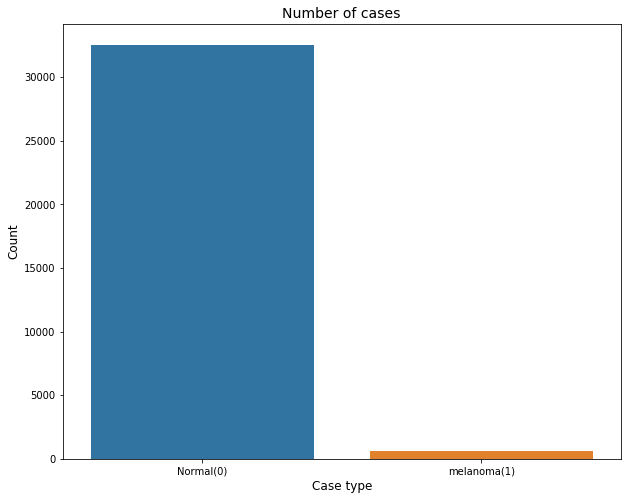

In [7]:
# Get the counts for each class
cases_count = df_train['target'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'melanoma(1)'])
plt.show()

It's an imbalance problem, we have `32542` normal sample vs only `584` melanoma sample. Although, in applications of machine learning to healthcare related problem the goal is always to minimize the **False Postive Rate (FPR)**. A false positive is when the model wrongly predict that the patient doesn't have melanoma when really he had it.

In [9]:
df_train.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


### `Sex`

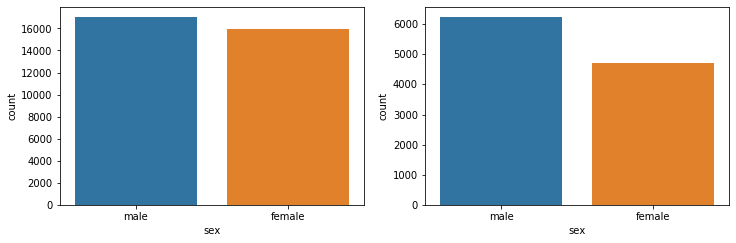

In [48]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(df_train.sex)

plt.subplot(2, 2, 2)
sns.countplot(df_test.sex)

In [15]:
df_test.sex.value_counts(normalize=True)

male      0.569568
female    0.430432
Name: sex, dtype: float64

### `pateint_id`

In [26]:
uni_pat_train = df_train.patient_id.nunique()
uni_pat_test = df_test.patient_id.nunique()

print(f"TRAIN --> We have: {uni_pat_train} Unique pateint. That mean {df_train.shape[0] // uni_pat_train} image per pateient")
print(f"TEST --> We have: {uni_pat_test} Unique pateint. That mean {df_test.shape[0] // uni_pat_test} image per pateient")

TRAIN --> We have: 2056 Unique pateint. That mean 16 image per pateient
TEST --> We have: 690 Unique pateint. That mean 15 image per pateient


### `Age`

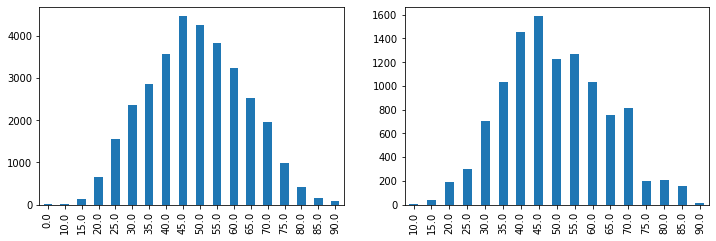

In [38]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df_train.age_approx.value_counts().sort_index().plot(kind='bar')

plt.subplot(2, 2, 2)
df_test.age_approx.value_counts().sort_index().plot(kind='bar')

### `anatom_site_general_challenge`

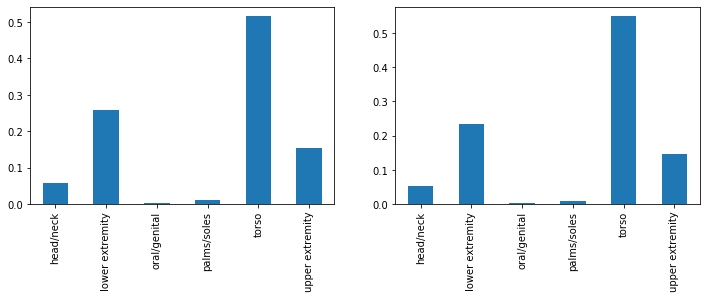

In [42]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df_train.anatom_site_general_challenge.value_counts(normalize=True).sort_index().plot(kind='bar')

plt.subplot(2, 2, 2)
df_test.anatom_site_general_challenge.value_counts(normalize=True).sort_index().plot(kind='bar')

In [46]:
df_train.diagnosis.value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64

In [20]:
df_train.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')